In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('data.csv')

In [3]:
train.shape

(98000, 30)

In [4]:
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [5]:
train_id = train['id']

In [6]:
train.drop('id',axis=1,inplace=True)

In [7]:
train.shape

(98000, 29)

## EDA

#### Numerical feature

In [8]:
num_feature = [feature for feature in train.columns if train[feature].dtype != 'o']

In [9]:
print('Number of Numerical features:' ,len(num_feature))

Number of Numerical features: 29


In [10]:
#Discrete numerical features
disc_num_feature = [feature for feature in num_feature if len(train[feature].unique())<100]

print('Number of Discrete features:',len(disc_num_feature))

Number of Discrete features: 7


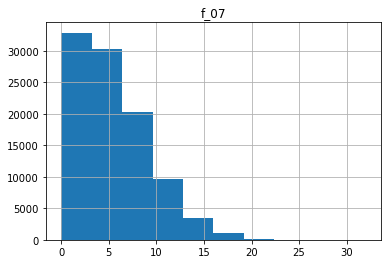

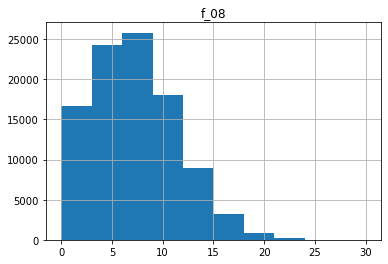

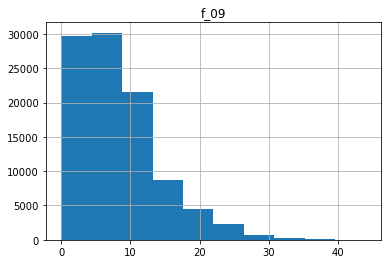

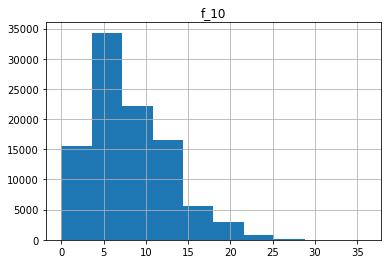

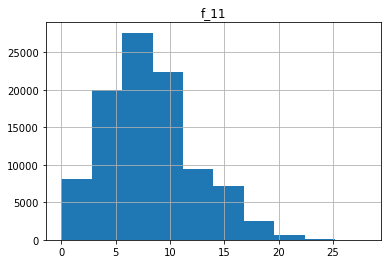

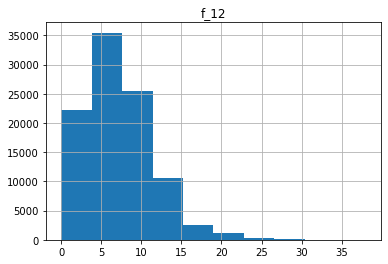

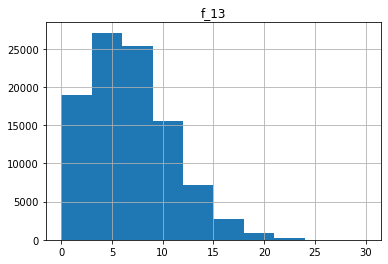

In [11]:
for feature in disc_num_feature:
    data = train.copy()
    data[feature].hist()
    plt.title(feature)
    plt.show()

In [12]:
#continuous numerical features

cont_num_feature = [feature for feature in num_feature if feature not in disc_num_feature]

print("Number of Continuous features: ",len(cont_num_feature))

Number of Continuous features:  22


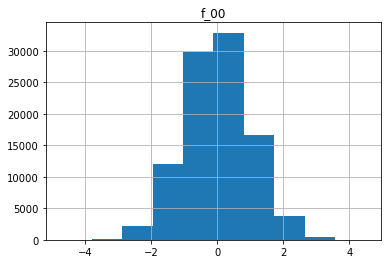

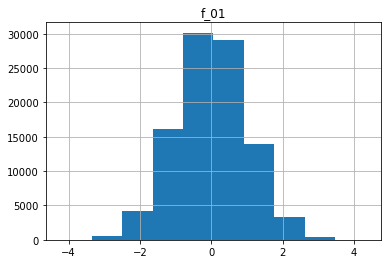

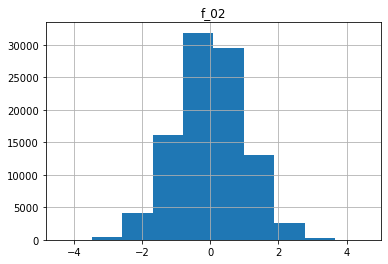

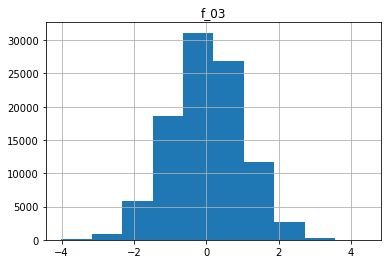

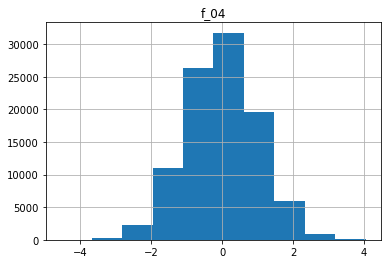

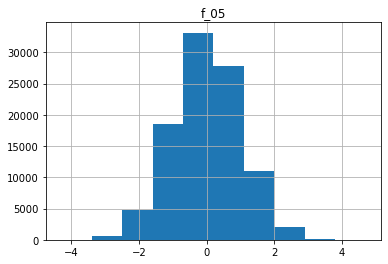

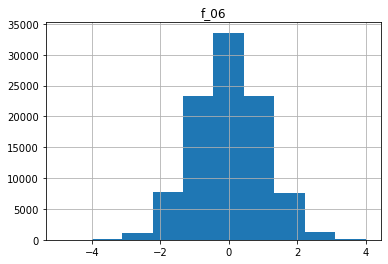

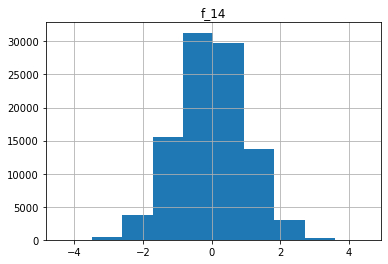

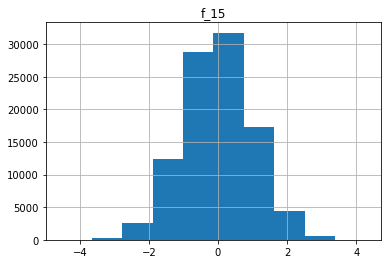

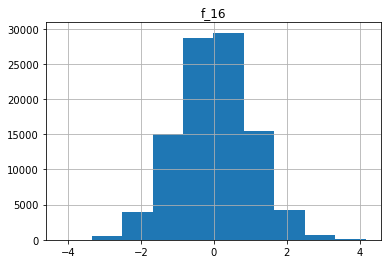

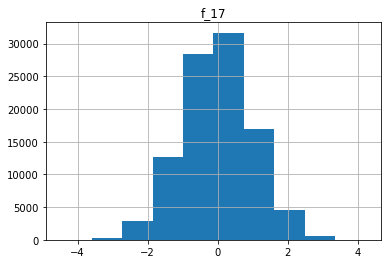

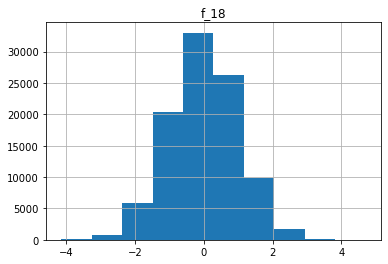

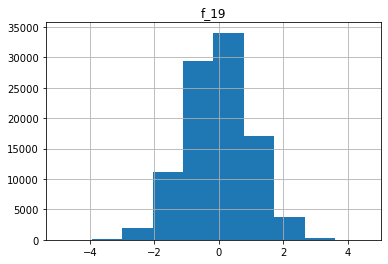

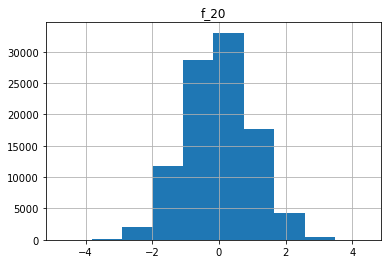

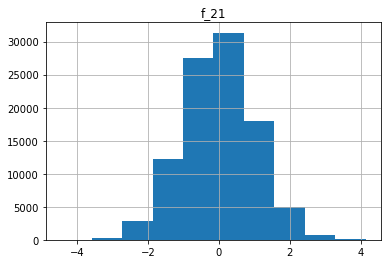

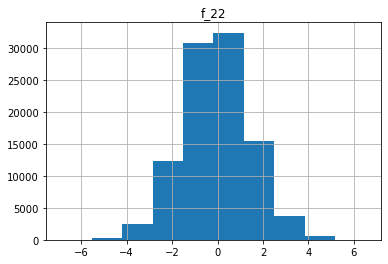

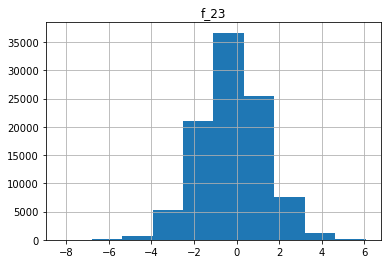

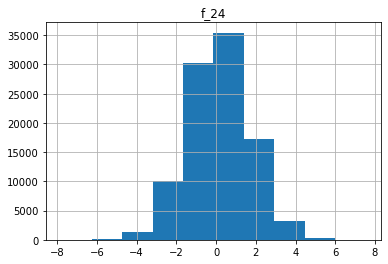

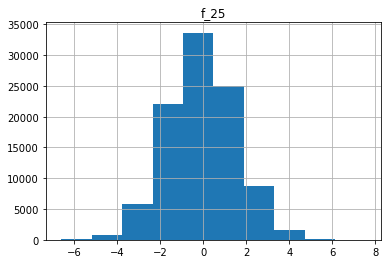

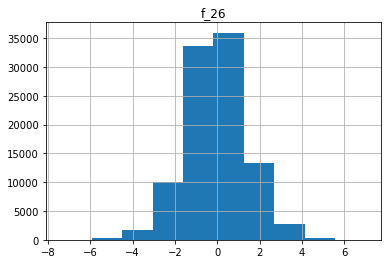

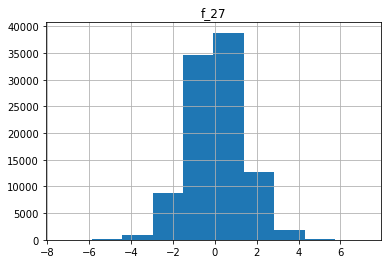

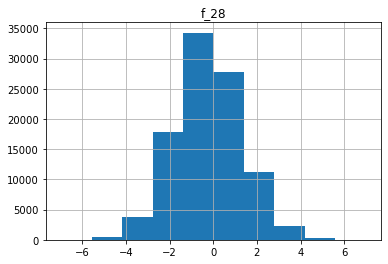

In [13]:
for feature in cont_num_feature:
    data = train.copy()
    data[feature].hist()
    plt.title(feature)
    plt.show()

## Feature engineering

In [14]:
sum(train.isna().sum())

0

### Create test variable as copy of train because we are going to remove outlier

In [15]:
test = train.copy()

## Outlier Removing

#### Handling Rare values in discrete numerical features

In [16]:
train

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,8,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,2,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,10,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,11,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


In [17]:
train['f_07'].value_counts()

4     10797
3     10728
5     10337
2      9861
6      9239
7      8197
1      7574
8      6743
9      5428
0      4717
10     4275
11     3182
12     2252
13     1633
14     1143
15      706
16      440
17      273
18      198
19      108
20       70
21       35
22       31
23       10
25        7
24        7
26        2
29        2
27        2
30        1
28        1
32        1
Name: f_07, dtype: int64

#### Handling Outlier in continuous numerical features

In [18]:
cont_num_feature

['f_00',
 'f_01',
 'f_02',
 'f_03',
 'f_04',
 'f_05',
 'f_06',
 'f_14',
 'f_15',
 'f_16',
 'f_17',
 'f_18',
 'f_19',
 'f_20',
 'f_21',
 'f_22',
 'f_23',
 'f_24',
 'f_25',
 'f_26',
 'f_27',
 'f_28']

In [19]:
#Using Power transform on data to make distribution as Gausion like
from sklearn.preprocessing import PowerTransformer

In [20]:
pow_scaler = PowerTransformer()

In [21]:
train[num_feature] = pow_scaler.fit_transform(train[num_feature])

In [22]:
train.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389230,-0.917652,0.647948,0.590717,-0.824836,0.734685,2.259470,-0.977987,1.383372,1.039938,...,-0.472922,-0.753925,-0.763110,-0.707876,0.911477,-0.678852,0.768543,0.960344,1.042536,0.694234
1,-0.688368,-0.458647,0.653182,0.995359,-1.644030,0.864898,-0.085604,-0.977987,-0.875405,-0.179925,...,-0.423594,-0.088164,-1.777545,-0.535582,0.453824,1.031505,-0.117686,-0.550783,0.367242,-1.636652
2,0.805709,0.319397,-1.166935,-0.622421,0.108371,0.785018,1.990489,0.021718,1.017648,-0.394246,...,-0.408425,-1.598612,1.194423,2.203065,0.086974,-1.519163,-0.568662,0.978900,-0.926277,-2.296373
3,-0.500469,0.223997,0.262677,0.234061,0.417047,-1.218768,0.144455,0.286548,-1.213526,0.917564,...,0.620278,1.283827,0.532884,0.731623,-1.218086,0.826492,-1.173592,-0.395085,-0.100021,0.326682
4,-0.670427,-1.044482,-0.270854,-1.833338,-0.285955,-1.849243,0.787627,0.756900,0.187543,-0.394246,...,-1.614933,-0.432406,0.321899,0.228337,-1.482684,0.847999,-0.613935,1.164389,-0.374203,-1.160058


### Create test variable as copy of train because we are going to remove outlier

#### remove outlier in continuous numerical feature

In [222]:
def removing_outlier_thresholds_iqr(dataframe, col_name, th1=0.25, th3=0.75):
    for col in col_name:
        quartile1 = dataframe[col].quantile(th1)
        quartile3 = dataframe[col].quantile(th3)
        iqr = quartile3 - quartile1
        upper_limit = quartile3 + 1.5 * iqr
        lower_limit = quartile1 - 1.5 * iqr
        
        dataframe = dataframe[(dataframe[col]>lower_limit) & (dataframe[col]<upper_limit)]
        
        return dataframe

In [25]:
train = removing_outlier_thresholds_iqr(train,num_feature)
train

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389230,-0.917652,0.647948,0.590717,-0.824836,0.734685,2.259470,-0.977987,1.383372,1.039938,...,-0.472922,-0.753925,-0.763110,-0.707876,0.911477,-0.678852,0.768543,0.960344,1.042536,0.694234
1,-0.688368,-0.458647,0.653182,0.995359,-1.644030,0.864898,-0.085604,-0.977987,-0.875405,-0.179925,...,-0.423594,-0.088164,-1.777545,-0.535582,0.453824,1.031505,-0.117686,-0.550783,0.367242,-1.636652
2,0.805709,0.319397,-1.166935,-0.622421,0.108371,0.785018,1.990489,0.021718,1.017648,-0.394246,...,-0.408425,-1.598612,1.194423,2.203065,0.086974,-1.519163,-0.568662,0.978900,-0.926277,-2.296373
3,-0.500469,0.223997,0.262677,0.234061,0.417047,-1.218768,0.144455,0.286548,-1.213526,0.917564,...,0.620278,1.283827,0.532884,0.731623,-1.218086,0.826492,-1.173592,-0.395085,-0.100021,0.326682
4,-0.670427,-1.044482,-0.270854,-1.833338,-0.285955,-1.849243,0.787627,0.756900,0.187543,-0.394246,...,-1.614933,-0.432406,0.321899,0.228337,-1.482684,0.847999,-0.613935,1.164389,-0.374203,-1.160058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.236079,1.649018,-0.688341,0.316100,-0.294857,0.330198,1.611098,0.021718,0.187543,0.191659,...,-0.285699,-0.255975,-0.972161,0.952876,0.407860,1.283842,-0.075219,-0.989846,0.166988,0.459507
97996,0.320923,0.704623,0.561468,-1.322145,-0.353335,0.183118,0.184227,-0.598123,0.622133,-1.243439,...,0.120203,1.383738,0.341845,1.158978,-0.429211,0.271421,0.783851,0.141914,0.692651,0.639735
97997,-0.249521,-0.464239,1.890043,-1.340827,0.197689,-0.557889,-0.375854,0.756900,0.622133,0.509344,...,-0.842327,-1.783844,-1.265007,-0.995900,1.450009,0.867108,0.180931,1.539188,1.178636,0.584929
97998,0.309671,2.175648,0.760608,0.438831,0.466863,0.063461,-0.329904,-1.440987,0.410491,0.653205,...,-0.007794,1.115797,1.571869,0.278189,0.512721,0.687465,-0.286145,-1.085469,-0.538491,0.129094


# Feature selection

<AxesSubplot:>

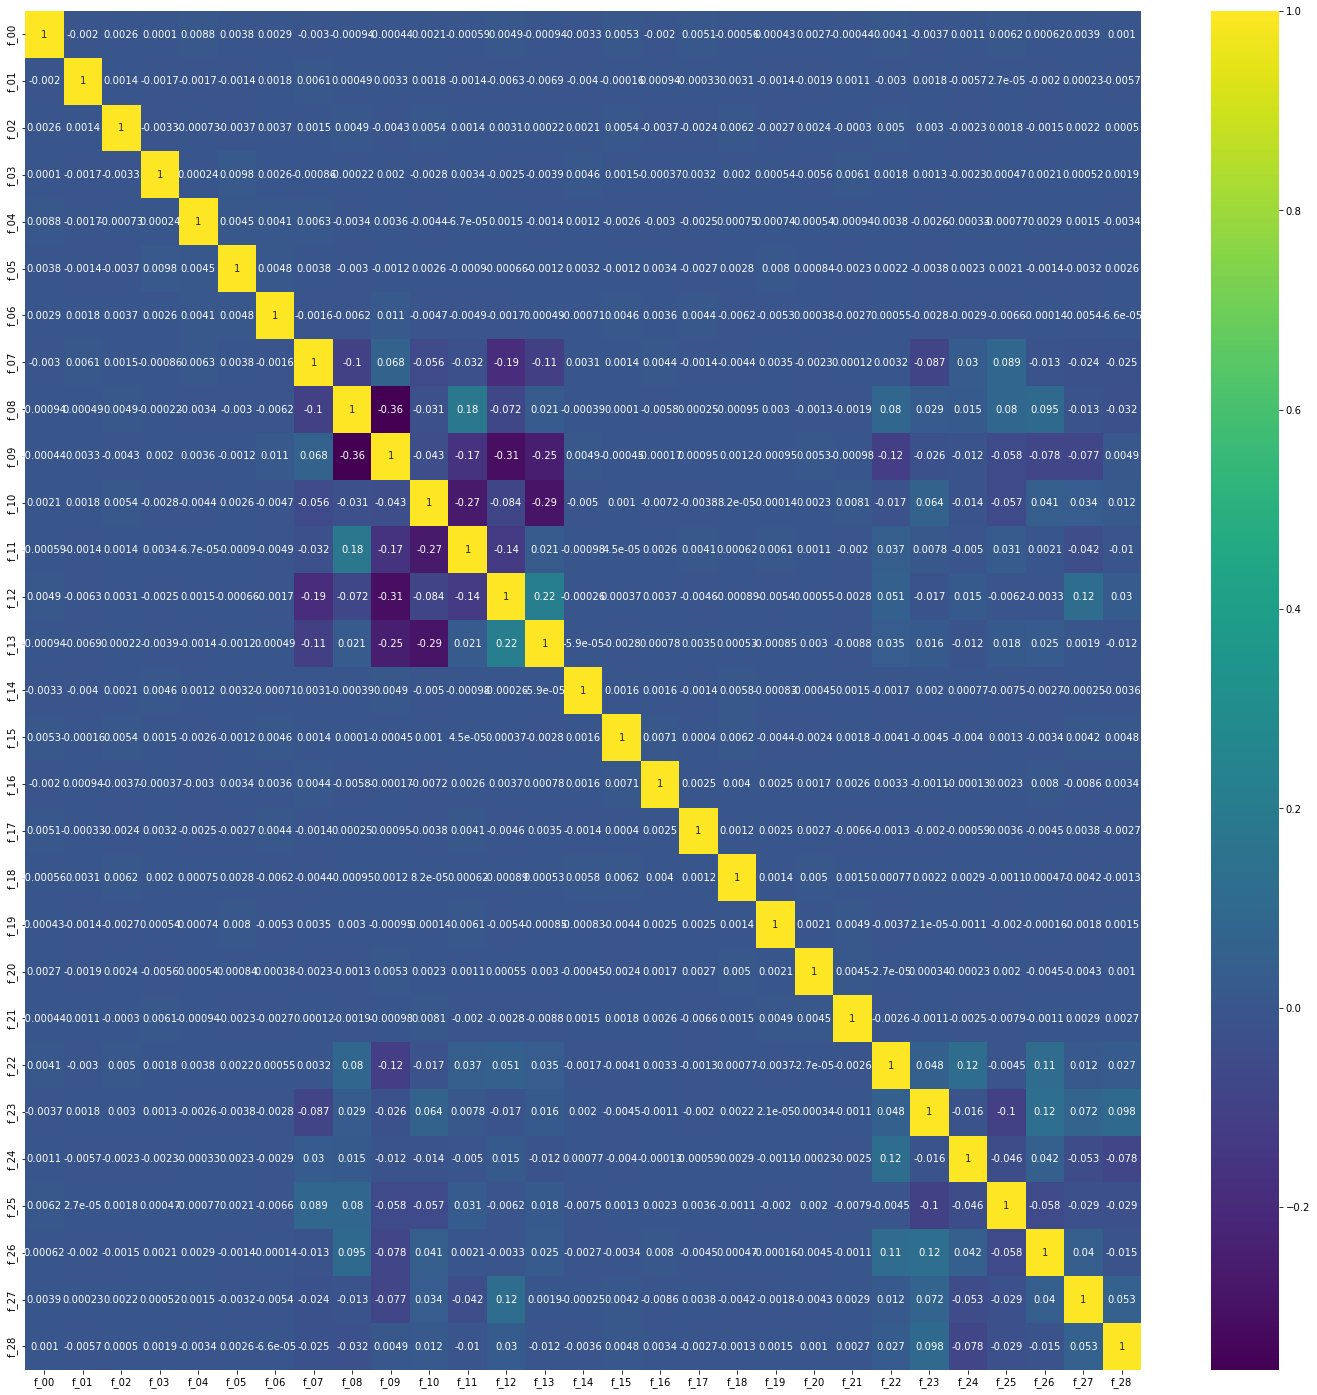

In [26]:
plt.figure(figsize=(25,25))
sns.heatmap(train.corr(),annot=True,cmap='viridis')

In [27]:
X_train = train.copy()
sel_feature = ['f_07','f_08','f_09','f_10','f_11','f_12','f_13','f_22','f_23','f_24','f_25','f_26','f_27','f_28']
X_train = X_train[sel_feature]

# Apply feature engineering and feature selection on test data

In [28]:
test.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [29]:
test[num_feature] = pow_scaler.transform(test[num_feature])

In [30]:
test.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389230,-0.917652,0.647948,0.590717,-0.824836,0.734685,2.259470,-0.977987,1.383372,1.039938,...,-0.472922,-0.753925,-0.763110,-0.707876,0.911477,-0.678852,0.768543,0.960344,1.042536,0.694234
1,-0.688368,-0.458647,0.653182,0.995359,-1.644030,0.864898,-0.085604,-0.977987,-0.875405,-0.179925,...,-0.423594,-0.088164,-1.777545,-0.535582,0.453824,1.031505,-0.117686,-0.550783,0.367242,-1.636652
2,0.805709,0.319397,-1.166935,-0.622421,0.108371,0.785018,1.990489,0.021718,1.017648,-0.394246,...,-0.408425,-1.598612,1.194423,2.203065,0.086974,-1.519163,-0.568662,0.978900,-0.926277,-2.296373
3,-0.500469,0.223997,0.262677,0.234061,0.417047,-1.218768,0.144455,0.286548,-1.213526,0.917564,...,0.620278,1.283827,0.532884,0.731623,-1.218086,0.826492,-1.173592,-0.395085,-0.100021,0.326682
4,-0.670427,-1.044482,-0.270854,-1.833338,-0.285955,-1.849243,0.787627,0.756900,0.187543,-0.394246,...,-1.614933,-0.432406,0.321899,0.228337,-1.482684,0.847999,-0.613935,1.164389,-0.374203,-1.160058


In [32]:
test = test[sel_feature]

In [33]:
test.head()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.977987,1.383372,1.039938,-0.567775,1.142180,-0.083596,0.086073,-0.707876,0.911477,-0.678852,0.768543,0.960344,1.042536,0.694234
1,-0.977987,-0.875405,-0.179925,-0.837020,-0.420725,1.725834,0.738456,-0.535582,0.453824,1.031505,-0.117686,-0.550783,0.367242,-1.636652
2,0.021718,1.017648,-0.394246,0.124844,0.296135,-0.928325,1.118063,2.203065,0.086974,-1.519163,-0.568662,0.978900,-0.926277,-2.296373
3,0.286548,-1.213526,0.917564,0.124844,0.296135,-0.083596,-0.434221,0.731623,-1.218086,0.826492,-1.173592,-0.395085,-0.100021,0.326682
4,0.756900,0.187543,-0.394246,-1.135381,-1.954502,1.271662,1.118063,0.228337,-1.482684,0.847999,-0.613935,1.164389,-0.374203,-1.160058


In [35]:
test.shape

(98000, 14)

# Apply Clustering Technique

In [36]:
from yellowbrick.cluster import KElbowVisualizer

In [43]:
from sklearn.cluster import KMeans

In [44]:
model = KMeans()

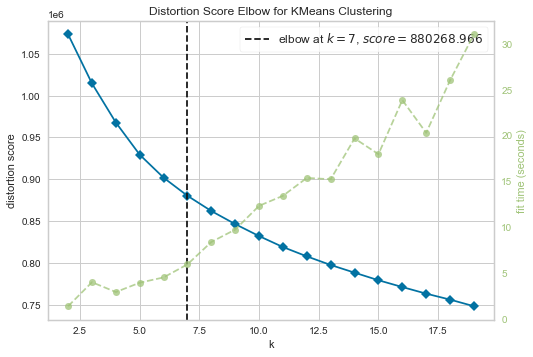

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
visualizer = KElbowVisualizer(model,k=(2,20),timings=True)
visualizer.fit(X_train)
visualizer.show()

# BGMM(Bayesian Gaussian Mixture Models Clustering Algorithm)

In [37]:
from sklearn.mixture import BayesianGaussianMixture

In [38]:
bayesian_gmm = BayesianGaussianMixture(n_components=7,n_init=3,random_state=1,max_iter=200)
bayesian_gmm.fit(X_train)

BayesianGaussianMixture(max_iter=200, n_components=7, n_init=3, random_state=1)

In [170]:
pred=bayesian_gmm.predict(test)

In [171]:
pred_prob = bayesian_gmm.predict_proba(test)

In [172]:
np.set_printoptions(suppress=True,precision=10)
pred_prob

array([[0.0033134487, 0.0025552127, 0.0004360739, ..., 0.0133019548,
        0.0000005124, 0.9770206651],
       [0.0174903034, 0.0285675961, 0.0033713673, ..., 0.9359050737,
        0.0143509763, 0.0003055009],
       [0.0000999515, 0.0000178089, 0.0014608731, ..., 0.0003439817,
        0.0000000103, 0.8124187773],
       ...,
       [0.0010386428, 0.0003112512, 0.0336682941, ..., 0.0082676344,
        0.0000915314, 0.0062332813],
       [0.6985111329, 0.0379887976, 0.0004283837, ..., 0.0842269096,
        0.0405847474, 0.0005392863],
       [0.0516666379, 0.8125151888, 0.0000114578, ..., 0.000930365 ,
        0.0000000643, 0.1348762823]])

In [173]:
pred_prob = np.max(pred_prob,axis=1)
pred_prob

array([0.9770206651, 0.9359050737, 0.8124187773, ..., 0.9503893648,
       0.6985111329, 0.8125151888])

In [174]:
pred_prob = pd.DataFrame(pred_prob,columns=['Predicted_prob'])

In [175]:
len(pred)

98000

In [176]:
train_id.head()

0    0
1    1
2    2
3    3
4    4
Name: id, dtype: int64

In [177]:
pred = pd.DataFrame(pred,columns=['Predicted'])

In [178]:
submission_1_ = pd.concat([train_id,pred_prob,pred],axis=1)

In [179]:
submission_1_

,id,Predicted_prob,Predicted
0,0,0.977021,6
1,1,0.935905,4
2,2,0.812419,6
3,3,0.853832,5
4,4,0.979402,2
...,...,...,...
97995,97995,0.484719,4
97996,97996,0.540853,1
97997,97997,0.950389,3
97998,97998,0.698511,0


<AxesSubplot:xlabel='Predicted', ylabel='count'>

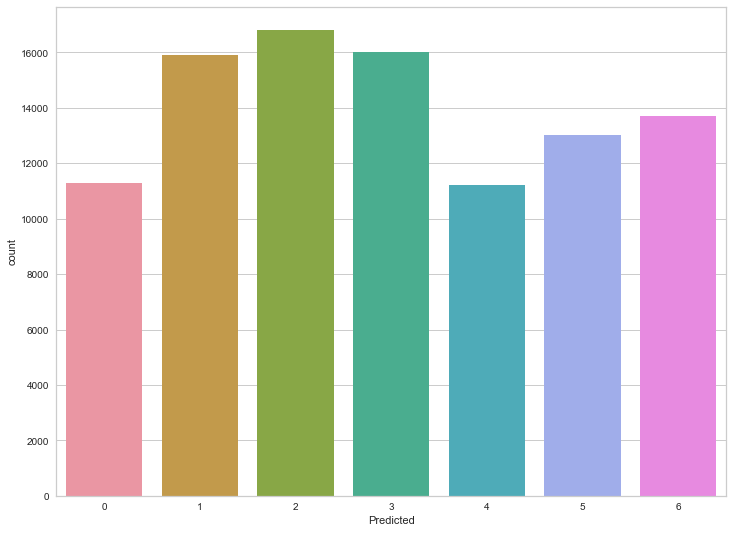

In [180]:
plt.figure(figsize=(12,9))
sns.countplot(x='Predicted',data=pred)

# Supervised learning

In [181]:
train = pd.read_csv('data.csv')

In [182]:
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [183]:
test_df = train.copy()

In [184]:
test_df_id = test_df['id']

In [185]:
test_df.drop('id',axis=1,inplace=True)

In [186]:
test_df.shape

(98000, 29)

#### concat predicted prob and predicted class of each row

In [187]:
train = pd.concat([train,submission_1_.drop('id',axis=1)],axis=1)

In [188]:
train

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,Predicted_prob,Predicted
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527,0.977021,6
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541,0.935905,4
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723,0.812419,6
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333,0.853832,5
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263,0.979402,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,...,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039,0.484719,4
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,...,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642,0.540853,1
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,...,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466,0.950389,3
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,...,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211,0.698511,0


In [189]:
train_df = train[train['Predicted_prob']>=0.85].copy()

In [190]:
train_df.shape

(56424, 32)

# feature Engineering on train_df

In [192]:
train_df.drop(['id','Predicted_prob'],axis=1,inplace=True)

In [193]:
train_df

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,Predicted
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527,6
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541,4
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333,5
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263,2
6,-0.096137,-0.247528,-0.642176,-0.534849,1.051045,0.257412,-2.129200,2,2,17,...,-1.789098,0.639049,-0.798952,-2.081934,0.628047,-2.463677,0.567283,0.159789,1.488937,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97991,-0.303708,-0.797879,-0.772272,1.442967,1.389905,0.978757,-0.139647,6,12,2,...,2.682888,1.025655,-0.218533,-1.667824,1.469269,-0.011283,0.153440,-1.347242,-0.929179,6
97992,0.685776,-1.115344,0.356880,2.667240,-1.031307,1.651698,0.176495,3,9,5,...,-0.188834,-0.689030,0.025810,-0.587674,1.321239,-0.688175,1.591827,-1.470399,-1.943973,0
97993,-0.388822,-1.500236,-1.192212,0.352719,-1.789202,-0.646944,0.616359,7,5,9,...,-1.896270,0.443691,-1.473671,0.080730,2.202357,1.207277,0.798196,0.892548,-0.660606,3
97994,0.098658,-0.173168,-0.522142,-0.413573,0.409069,-0.273339,-0.579293,9,0,3,...,-0.234113,0.898987,0.156710,-2.759610,-3.797999,1.122025,-0.353271,1.036779,0.582197,4


In [194]:
train_df['Predicted'].value_counts()

5    10225
3     9655
2     8930
6     8830
1     8385
0     6731
4     3668
Name: Predicted, dtype: int64

In [195]:
train_df.shape

(56424, 30)

In [196]:
#Using Power transform on data to make distribution as Gausion like
from sklearn.preprocessing import PowerTransformer

In [197]:
pow_scaler = PowerTransformer()

In [198]:
train_df[num_feature] = pow_scaler.fit_transform(train_df[num_feature])

In [199]:
train_df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,Predicted
0,-0.388215,-0.915648,0.648630,0.594704,-0.826335,0.733203,2.253873,-0.842849,1.318969,0.866500,...,-0.753294,-0.760182,-0.666150,0.861539,-0.671803,0.721293,0.882262,0.987938,0.639901,6
1,-0.687159,-0.456494,0.653869,0.997119,-1.645988,0.862945,-0.086587,-0.842849,-0.759039,-0.244528,...,-0.086670,-1.766854,-0.502101,0.427196,0.992526,-0.132519,-0.491353,0.354761,-1.577164,4
3,-0.499392,0.227874,0.263023,0.239552,0.415440,-1.218072,0.143445,0.358317,-1.077761,0.754897,...,1.284349,0.529555,0.692113,-1.158578,0.793481,-1.142005,-0.349681,-0.085628,0.290318,5
4,-0.669231,-1.042412,-0.270981,-1.828762,-0.287349,-1.849431,0.785907,0.787634,0.228197,-0.439363,...,-0.431257,0.319224,0.220669,-1.409447,0.814366,-0.607709,1.067544,-0.345226,-1.123824,2
6,-0.095777,-0.249786,-0.641916,-0.525771,1.049296,0.258430,-2.143673,-0.842849,-1.077761,1.173044,...,-1.787243,0.635899,-0.475679,-1.183955,0.284791,-1.496388,0.413071,0.066660,1.044033,5


In [200]:
train_df.shape

(56424, 30)

In [201]:
train_df_X = train_df.drop('Predicted',axis=1)

In [202]:
train_df_y = train_df['Predicted']

In [203]:
train_df_X.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.388215,-0.915648,0.648630,0.594704,-0.826335,0.733203,2.253873,-0.842849,1.318969,0.866500,...,-0.472420,-0.753294,-0.760182,-0.666150,0.861539,-0.671803,0.721293,0.882262,0.987938,0.639901
1,-0.687159,-0.456494,0.653869,0.997119,-1.645988,0.862945,-0.086587,-0.842849,-0.759039,-0.244528,...,-0.423218,-0.086670,-1.766854,-0.502101,0.427196,0.992526,-0.132519,-0.491353,0.354761,-1.577164
3,-0.499392,0.227874,0.263023,0.239552,0.415440,-1.218072,0.143445,0.358317,-1.077761,0.754897,...,0.620321,1.284349,0.529555,0.692113,-1.158578,0.793481,-1.142005,-0.349681,-0.085628,0.290318
4,-0.669231,-1.042412,-0.270981,-1.828762,-0.287349,-1.849431,0.785907,0.787634,0.228197,-0.439363,...,-1.609618,-0.431257,0.319224,0.220669,-1.409447,0.814366,-0.607709,1.067544,-0.345226,-1.123824
6,-0.095777,-0.249786,-0.641916,-0.525771,1.049296,0.258430,-2.143673,-0.842849,-1.077761,1.173044,...,1.297683,-1.787243,0.635899,-0.475679,-1.183955,0.284791,-1.496388,0.413071,0.066660,1.044033


### Feature selection on train_df

In [204]:
sel_feature

['f_07',
 'f_08',
 'f_09',
 'f_10',
 'f_11',
 'f_12',
 'f_13',
 'f_22',
 'f_23',
 'f_24',
 'f_25',
 'f_26',
 'f_27',
 'f_28']

In [205]:
train_df_X = train_df_X[sel_feature]
train_df_X.head()

,f_07,f_08,f_09,f_10,f_11,f_12,f_13,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.842849,1.318969,0.866500,-0.623433,1.079639,0.021827,0.260871,-0.666150,0.861539,-0.671803,0.721293,0.882262,0.987938,0.639901
1,-0.842849,-0.759039,-0.244528,-0.874275,-0.366686,1.607648,0.862796,-0.502101,0.427196,0.992526,-0.132519,-0.491353,0.354761,-1.577164
3,0.358317,-1.077761,0.754897,0.025642,0.300492,0.021827,-0.237988,0.692113,-1.158578,0.793481,-1.142005,-0.349681,-0.085628,0.290318
4,0.787634,0.228197,-0.439363,-1.151146,-1.826293,1.221109,1.202873,0.220669,-1.409447,0.814366,-0.607709,1.067544,-0.345226,-1.123824
6,-0.842849,-1.077761,1.173044,0.904001,-0.612618,-0.769699,-1.921216,-0.475679,-1.183955,0.284791,-1.496388,0.413071,0.066660,1.044033


### feature engineering on test_df

In [206]:
test_df.shape

(98000, 29)

In [207]:
test_df[num_feature] = pow_scaler.transform(test_df[num_feature])

In [208]:
test_df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.388215,-0.915648,0.648630,0.594704,-0.826335,0.733203,2.253873,-0.842849,1.318969,0.866500,...,-0.472420,-0.753294,-0.760182,-0.666150,0.861539,-0.671803,0.721293,0.882262,0.987938,0.639901
1,-0.687159,-0.456494,0.653869,0.997119,-1.645988,0.862945,-0.086587,-0.842849,-0.759039,-0.244528,...,-0.423218,-0.086670,-1.766854,-0.502101,0.427196,0.992526,-0.132519,-0.491353,0.354761,-1.577164
2,0.806981,0.323685,-1.167870,-0.615623,0.106913,0.783357,1.985775,0.112842,0.987222,-0.439363,...,-0.408087,-1.600008,1.189720,2.058482,0.079113,-1.492739,-0.564421,0.899114,-0.869965,-2.204705
3,-0.499392,0.227874,0.263023,0.239552,0.415440,-1.218072,0.143445,0.358317,-1.077761,0.754897,...,0.620321,1.284349,0.529555,0.692113,-1.158578,0.793481,-1.142005,-0.349681,-0.085628,0.290318
4,-0.669231,-1.042412,-0.270981,-1.828762,-0.287349,-1.849431,0.785907,0.787634,0.228197,-0.439363,...,-1.609618,-0.431257,0.319224,0.220669,-1.409447,0.814366,-0.607709,1.067544,-0.345226,-1.123824


In [209]:
test_df = test_df[sel_feature]

In [210]:
test_df.shape

(98000, 14)

# BGMM Classification

In [211]:
from sklego.mixture import BayesianGMMClassifier

In [212]:
model = BayesianGMMClassifier(n_components=7,max_iter=400,n_init=4)

In [213]:
model.fit(train_df_X,train_df_y)

BayesianGMMClassifier(max_iter=400, n_components=7, n_init=4)

In [214]:
pred = model.predict(test_df)

In [215]:
len(pred)

98000

In [216]:
test_df_id.head()

0    0
1    1
2    2
3    3
4    4
Name: id, dtype: int64

In [217]:
pred = pd.DataFrame(pred,columns=['Predicted'])

In [218]:
submission = pd.concat([test_df_id,pred],axis=1)

In [219]:
submission

,id,Predicted
0,0,6
1,1,4
2,2,3
3,3,5
4,4,2
...,...,...
97995,97995,4
97996,97996,1
97997,97997,3
97998,97998,0


In [220]:
submission.to_csv('submission_BGMM.csv',index=False)

<AxesSubplot:xlabel='Predicted', ylabel='count'>

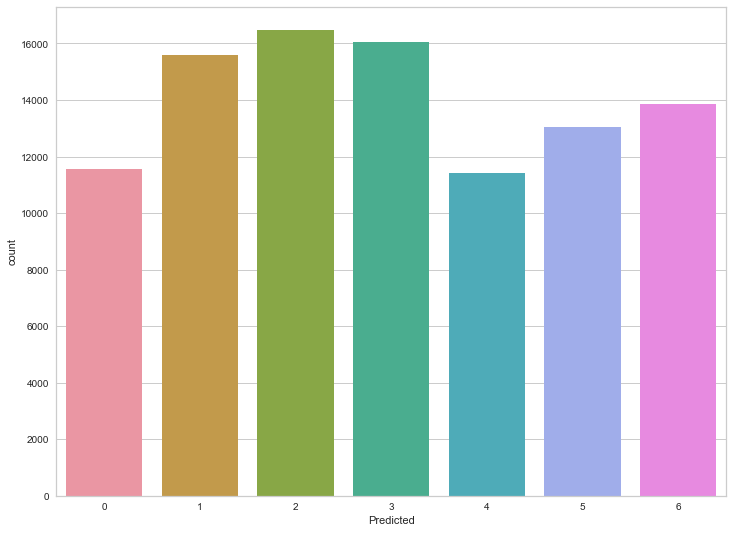

In [221]:
plt.figure(figsize=(12,9))
sns.countplot(x='Predicted',data=pred)